In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


I download the data from jadi's repository >>> https://github.com/jadijadi/machine_learning_with_python_jadi/blob/main/FuelConsumption.csv

In [9]:
# in order to analys and understand the data we use pandas
df = pd.read_csv("FuelConsumption.csv")

# check the headers 
df.head()
# df['ENGINESIZE'].head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
# to undrestand about the features of the data
df.describe()
# std of year is 0 means they are all from 2014

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


now we select the features we want to make model of it and work on it

In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


now to find which feature gives the best
possible result, we visualize each feature result with matplotlib


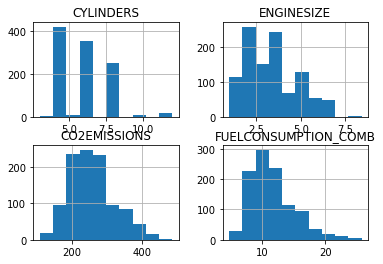

In [14]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
# hist gives the number of each feature in the main data
# Sample : we have 400 cars with 4 cylinders
plt.show()

The plot of each feature and CO2EMISSIONS


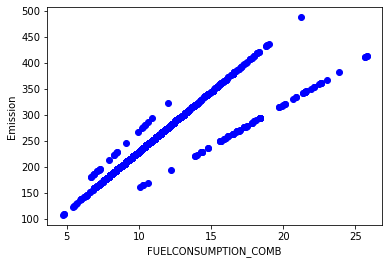

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
# plt.scatter(x,y,how to show)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

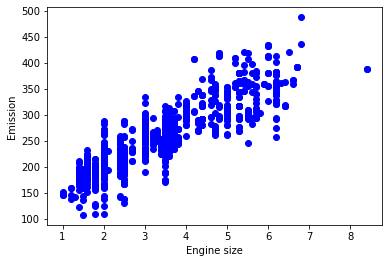

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
# this looks to be the best feature for linear regression

The reason we show the plots is to undrestand working on which data help us to have a better model

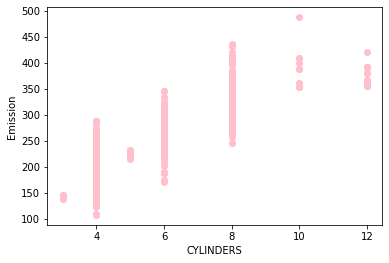

In [19]:
# PRACTICE 
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='pink')
plt.xlabel('CYLINDERS')
plt.ylabel('Emission')
plt.show()

now we want to find the minimum error and the best linear ; so we want to write something like : y=ax+b and now we must find the best a and b .
Inorder to get the best result we use 80% of the data to train the model and 20% to test it

In [26]:
# msk = np.random.rand(len(df)) < 0.8

# for better undrestanding 
sample = np.random.rand(10)
#this gives an array with 10 objects
print(sample)
sample < 0.8
# this gives us an array which 80% of the numbers are less than 0.8


[0.0486015  0.80137347 0.52407464 0.3420747  0.13423918 0.218966
 0.24973829 0.96895598 0.69740863 0.30573942]


array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True])

In [25]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)
print(train)
print(test)

[ True  True  True ...  True  True  True]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
4            3.5          6                  10.6           244
5            3.5          6                  10.0           230
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[846 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
3            3.5          6                  11.1           255
6            3.5          6           

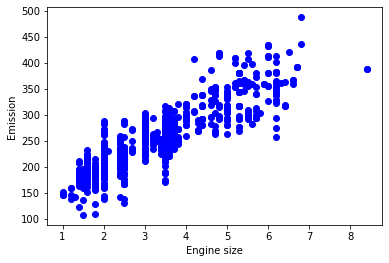

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y) # return the y=ax+b
# The coefficients
print ('Coefficients: ', regr.coef_) #this is the best a
print ('Intercept: ',regr.intercept_) #this is the best b

Coefficients:  [[39.21121037]]
Intercept:  [125.16152649]


Text(0, 0.5, 'Emission')

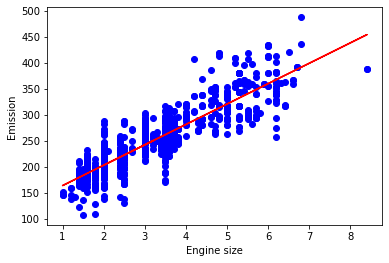

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [30]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # how much the real y is
test_y_ = regr.predict(test_x) #how dose our model predict the y
# here we calculate the error 
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.38
Residual sum of squares (MSE): 1076.13
R2-score: 0.73
